<a href="https://colab.research.google.com/github/UAPaulVanLaer/Autorec/blob/main/AutoRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:



!pip install --user pandas numpy matplotlib sklearn


In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import gzip
import json
from tqdm import tqdm
import os
from collections import Counter

In [ ]:
#read file line-by-line and parse json, returns dataframe
def parse_json(filename_gzipped_python_json, read_max=-1):
  #read gzipped content
  f=gzip.open(filename_gzipped_python_json,'r')
  
  #parse json
  parse_data = []
  for line in tqdm(f): #tqdm is for showing progress bar, always good when processing large amounts of data
    line = line.decode('utf-8')
    line = line.replace('true','True') #difference json/python
    line = line.replace('false','False')
    parsed_result = eval(line) #load python nested datastructure
    parse_data.append(parsed_result)
    if read_max !=-1 and len(parse_data) > read_max:
      print(f'Break reading after {read_max} records')
      break
  print(f"Reading {len(parse_data)} rows.")

  #create dataframe
  df= pd.DataFrame.from_dict(parse_data)
  return df


In [ ]:
food_path = '/content/drive/MyDrive/'
interactions = 'RAW_interactions.csv'
train_interactions = 'interactions_train.csv'
validation_interaction = 'interactions_validation.csv'
pp_recipes = 'PP_recipes.csv'
raw_recipes = 'RAW_recipes.csv'

In [ ]:
df_list = []
for dataset in [train_interactions, validation_interaction,pp_recipes,raw_recipes]:
  print(f"----- {dataset}-----")
  size = os.path.getsize(food_path + dataset) 
  print(f'Size of file is {size / 1000000}MB')
  df = pd.read_csv(food_path + dataset)
  pd.set_option('display.max_colwidth', None)
  display(df.head(5))
  display(df.describe(include='all'))
  df_list.append(df)

----- interactions_train.csv-----
Size of file is 28.248536MB


,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


,user_id,recipe_id,date,rating,u,i
count,6.989010e+05,698901.000000,698901,698901.000000,698901.000000,698901.000000
unique,NaN,NaN,6314,NaN,NaN,NaN
top,NaN,NaN,2008-01-27,NaN,NaN,NaN
freq,NaN,NaN,507,NaN,NaN,NaN
mean,1.247694e+07,156173.409849,NaN,4.574090,4249.330271,87519.330993
std,1.525031e+08,126594.880211,NaN,0.959022,5522.602821,51290.370370
min,1.533000e+03,38.000000,NaN,0.000000,0.000000,0.000000
25%,1.059880e+05,53169.000000,NaN,4.000000,455.000000,42988.000000
50%,2.301020e+05,116484.000000,NaN,5.000000,1737.000000,87424.000000
75%,4.801950e+05,234516.000000,NaN,5.000000,5919.000000,131731.000000


----- interactions_validation.csv-----
Size of file is 0.292316MB


,user_id,recipe_id,date,rating,u,i
0,76535,33627,2005-02-15,4.0,5,177317
1,160497,75307,2005-10-24,4.0,23,170785
2,930021,100961,2008-11-30,4.0,31,165555
3,58439,154105,2007-03-24,4.0,44,177453
4,628951,14525,2008-02-16,5.0,45,142367


,user_id,recipe_id,date,rating,u,i
count,7.023000e+03,7023.000000,7023,7023.000000,7023.000000,7023.000000
unique,NaN,NaN,3273,NaN,NaN,NaN
top,NaN,NaN,2009-04-17,NaN,NaN,NaN
freq,NaN,NaN,11,NaN,NaN,NaN
mean,1.947787e+07,206406.038018,NaN,4.232806,10298.033746,100122.151075
std,1.904689e+08,135238.437354,NaN,1.302910,6709.501293,52051.115779
min,1.533000e+03,120.000000,NaN,0.000000,5.000000,144.000000
25%,1.591190e+05,89851.500000,NaN,4.000000,4569.500000,56227.000000
50%,3.528340e+05,192146.000000,NaN,5.000000,9248.000000,104819.000000
75%,7.373315e+05,311632.500000,NaN,5.000000,15637.500000,146690.500000


----- PP_recipes.csv-----
Size of file is 204.912912MB


,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 2839, 1781, 40481]","[[2911, 1019, 249, 6878], [1353], [6953], [15341, 3261], [2056, 857, 643, 1631, 20480]]","[40480, 40482, 21662, 481, 6878, 500, 246, 1614, 1911, 10757, 240, 674, 9933, 8400, 40478, 40482, 1082, 589, 16126, 500, 481, 6878, 2839, 1781, 5024, 240, 488, 13770, 485, 23667, 40478, 40482, 1233, 481, 4165, 562, 481, 5186, 1454, 6878, 7213, 40478, 40482, 669, 481, 4165, 10230, 485, 256, 1178, 2107, 256, 240, 1233, 246, 17764, 562, 7648, 1571, 40478, 40482, 861, 7648, 1571, 240, 25690, 6878, 556, 481, 4438, 17080, 522, 246, 3602, 9082, 40478, 40482, 4103, 597, 240, 522, 1357, 504, 256, 1178, 2107, 256, 562, 609, 485, 282, 1808, 40478, 40481]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179], [8780], [6812], [4370, 2653, 18376], [2654, 5581, 34904, 5940], [15341], [10848], [21447, 7869], [6953]]","[40480, 40482, 729, 2525, 10906, 485, 43, 8393, 40478, 40482, 23667, 17918, 240, 25916, 240, 2507, 6444, 488, 8467, 1179, 40478, 40482, 4846, 6737, 8780, 488, 7087, 862, 40478, 40482, 3336, 666, 481, 2695, 498, 15473, 6847, 40478, 40482, 19007, 7648, 1571, 40478, 40482, 1000, 19093, 544, 15473, 23667, 6812, 240, 18376, 240, 5940, 240, 21298, 488, 6953, 488, 29369, 1073, 3866, 40478, 40482, 8240, 715, 19093, 488, 19007, 6828, 260, 14635, 1571, 1073, 4858, 544, 1233, 488, 2898, 13908, 500, 2732, 2323, 551, 2698, 40478, 40482, 851, 2548, 491, 844, 7858, 40478, 40482, 1892, 666, 19118, 488, 1325, 15405, 556, 6198, 31757, 488, 36672, 21940, 240, 645, 10114, 40478, 40482, 8658, 746, 775, 22519, 40478, 40481]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022, 1511, 3248, 4964, 6270]"
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332], [21453, 8361], [25845, 8111, 11332], [23488, 8361], [37754, 10734], [652, 25, 3035, 11959, 10734], [10837], [19811, 21137, 556, 20323, 15022, 296, 7, 4344, 6741], [11951, 4914], [1615, 23, 695, 2338, 6821], [2801, 30645, 4785, 6821], [17918]]","[40480, 40482, 8240, 481, 24176, 296, 1353, 666, 246, 1719, 5082, 40478, 40482, 4846, 481, 21298, 240, 37754, 10734, 240, 652, 25, 3035, 11959, 240, 296, 10837, 485, 481, 5082, 674, 2030, 485, 246, 14057, 40478, 40482, 1300, 714, 481, 2525, 296, 32093, 562, 284, 1571, 40478, 40482, 4846, 481, 6945, 19811, 240, 4914, 240, 296, 6821, 240, 9467, 1073, 6737, 40478, 40482, 7087, 481, 17918, 556, 277, 13020, 9082, 498, 1353, 674, 9467, 666, 481, 8294, 40478, 40482, 32093, 562, 1007, 288, 260, 5895, 1571, 40478, 40481]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696, 7946, 5648, 7239, 7705, 7594, 1168, 2683]"
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, 484], [31843], [6821], [9514, 4914], [10444], [692, 37297, 17128]]","[40480, 40482, 5539, 21601, 1073, 903, 2324, 40478, 40482, 9933, 481, 4739, 488, 9467, 500, 27952, 7087, 488, 277, 278, 280, 3026, 31843, 278, 1251, 14923, 10734, 40478, 40482, 32093, 562, 281, 260, 284, 1571, 40478, 40482, 3336, 1270, 1645, 28447, 666, 10025, 19633, 7420, 40478, 40482, 9082, 11434, 9019, 500, 7420, 488, 1495, 556, 481, 281, 3, 21, 3696, 498, 31843, 488, 6821, 240, 13241, 10812, 40478, 40482, 19007, 500, 729, 6720, 44, 42, 46, 250, 10906, 562, 292, 1571, 240, 522, 107

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
count,178265.000000,178265.000000,178265,178265,178265,178265,178265.000000,178265
unique,NaN,NaN,176694,177699,178091,41760,NaN,177524
top,NaN,NaN,"[40480, 32043, 6821, 8294, 40481]","[[30295], [519, 1016], [22422], [1353], [6444]]","[40480, 40482, 851, 8780, 15799, 485, 844, 7858, 40478, 40482, 2523, 500, 728, 16126, 40478, 40482, 2653, 8780, 666, 7540, 619, 522, 1646, 1711, 522, 1983, 4537, 556, 246, 21470, 1742, 1580, 40478, 40482, 5463, 562, 491, 1423, 281, 1808, 781, 6255, 40478, 40482, 759, 580, 8056, 562, 1257, 485, 277, 3592, 500, 481, 9188, 522, 281, 2268, 500, 481, 15460, 40478, 40481]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN,"[4231, 4379, 5038, 7655, 6906]"
freq,NaN,NaN,5,5,9,6255,NaN,5
mean,213461.803007,89132.000000,NaN,NaN,NaN,NaN,0.863192,NaN
std,138266.712754,51460.817206,NaN,NaN,NaN,NaN,0.791486,NaN
min,38.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,94576.000000,44566.000000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,196312.000000,89132.000000,NaN,NaN,NaN,NaN,1.000000,NaN
75%,320562.000000,133698.000000,NaN,NaN,NaN,NaN,2.000000,NaN


----- RAW_recipes.csv-----
Size of file is 294.520189MB


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-pat

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
count,231636,231637.000000,2.316370e+05,2.316370e+05,231637,231637,231637,231637.000000,231637,226658,231637,231637.000000
unique,230185,NaN,NaN,NaN,5090,209115,229318,NaN,231074,222668,230475,NaN
top,chocolate banana smoothie,NaN,NaN,NaN,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'course', 'preparation', 'for-1-or-2', '5-ingredients-or-less', 'beverages', 'easy', 'cocktails', 'number-of-servings', '3-steps-or-less']","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,['blend all ingredients until smooth'],yum,"['eggs', 'water']",NaN
freq,3,NaN,NaN,NaN,470,397,36,NaN,20,153,10,NaN
mean,NaN,222014.708984,9.398546e+03,5.534885e+06,NaN,NaN,NaN,9.765499,NaN,NaN,NaN,9.051153
std,NaN,141206.635626,4.461963e+06,9.979141e+07,NaN,NaN,NaN,5.995128,NaN,NaN,NaN,3.734796
min,NaN,38.000000,0.000000e+00,2.700000e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000
25%,NaN,99944.000000,2.000000e+01,5.690500e+04,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,6.000000
50%,NaN,207249.000000,4.000000e+01,1.736140e+05,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,9.000000
75%,NaN,333816.000000,6.500000e+01,3.982750e+05,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,11.000000


In [ ]:
#df train
df = df_list[0].copy()
df_full = df_list[0].copy()

#df val
df_val = df_list[1].copy()
df_val_full = df_list[1].copy()

#df recipes
df_pp_recipes = df_list[2].copy()
df_raw_recipes = df_list[3].copy()

df.drop(['date', 'user_id','recipe_id'], axis=1, inplace=True)
df_val.drop(['date', 'user_id','recipe_id'], axis=1, inplace=True)
df_pp_recipes.drop(['name_tokens', 'ingredient_tokens','steps_tokens','techniques','calorie_level','ingredient_ids'], axis=1, inplace=True)
df_raw_recipes.drop(['contributor_id', 'submitted','nutrition','steps','n_ingredients','n_steps','description','ingredients','tags','minutes'], axis=1, inplace=True)

In [ ]:
joined_df_recipes = df_pp_recipes.join(df_raw_recipes.set_index('id'), on='id')


In [ ]:
"""
big_df = df.append(df_val)
print(big_df)
big_df = big_df[big_df.groupby('u').i.transform(len) > 5]
print(big_df)
big_df = big_df[big_df.groupby('i').u.transform(len) > 5]
print(big_df)

"""
#Get only top 7500 rated items and top 7500 users with most ratings
full_df = df_list[0].append(df_list[1])
big_df_2 = df.append(df_val)

grouped_1 = big_df_2.groupby(['u'], as_index = False, sort = False).agg({'i':'count'}).reset_index(drop = True)
grouped_1 = grouped_1.rename(columns = {'i':'reviews_count'})
grouped_1 = grouped_1.sort_values('reviews_count', ascending = False).iloc[:7500, :]

grouped_2 = big_df_2.groupby(['i'], as_index = False, sort = False).agg({'u':'count'}).reset_index(drop = True)
grouped_2 = grouped_2.rename(columns = {'u':'reviews_count'})
grouped_2 = grouped_2.sort_values('reviews_count', ascending = False).iloc[:7500, :]

big_df = pd.merge(big_df_2.merge(grouped_1).drop(['reviews_count'], axis = 1), grouped_2).drop(['reviews_count'], axis = 1)
print(big_df)
#"""

        rating     u       i
0          5.0  1674  106975
1          5.0  3425  106975
2          5.0   506  106975
3          3.0  1628  106975
4          4.0  3328  106975
...        ...   ...     ...
222038     5.0  1447    5700
222039     5.0  8914    5700
222040     5.0  8917    5700
222041     5.0  8908    5700
222042     5.0  8911    5700

[222043 rows x 3 columns]


In [ ]:
test_val_df = big_df
recipe_full_information = test_val_df.join(joined_df_recipes.set_index('i'), on='i', lsuffix='_caller', rsuffix='_other')
recipe_full_information = recipe_full_information.drop_duplicates(subset=['i'])
print(recipe_full_information)



        rating  ...                                                   name
0          5.0  ...                                      best banana bread
169        5.0  ...                                     blackberry pie iii
188        5.0  ...                                     casablanca chicken
203        5.0  ...                                         grilled salmon
232        5.0  ...                                     homemade pie crust
...        ...  ...                                                    ...
221975     0.0  ...            cheesy potato   italian sausage balls  5fix
221992     5.0  ...              cheddar stuffed potato cake and egg  5fix
222005     5.0  ...              quick and easy crabby caesar salads  5fix
222019     5.0  ...                  mac  n cheese and spinach strata  sp5
222033     0.0  ...  charge me up a1 steak   egg veggie breakfast wrap  a1

[7500 rows x 5 columns]


In [ ]:

new_userID = dict(zip(list(big_df['u'].unique()),
                      list(range(len(big_df['u'].unique())))))

new_recipeID = dict(zip(list(big_df['i'].unique()),
                        list(range(len(big_df['i'].unique())))))

print(big_df)
big_df = big_df.replace({'u': new_userID, 'i': new_recipeID})
print(big_df)

        rating     u       i
0          5.0  1674  106975
1          5.0  3425  106975
2          5.0   506  106975
3          3.0  1628  106975
4          4.0  3328  106975
...        ...   ...     ...
222038     5.0  1447    5700
222039     5.0  8914    5700
222040     5.0  8917    5700
222041     5.0  8908    5700
222042     5.0  8911    5700

[222043 rows x 3 columns]
        rating     u     i
0          5.0     0     0
1          5.0     1     0
2          5.0     2     0
3          3.0     3     0
4          4.0     4     0
...        ...   ...   ...
222038     5.0  7411  7499
222039     5.0  7476  7499
222040     5.0  7471  7499
222041     5.0  7473  7499
222042     5.0  7474  7499

[222043 rows x 3 columns]


In [ ]:
recipe_full_information = recipe_full_information.replace({'u': new_userID, 'i': new_recipeID})

In [ ]:
num_users=big_df['u'].max()+1
num_recipes=big_df['i'].max()+1
print(num_users)
print(num_recipes)

7480
7500


In [ ]:

import sys
np.set_printoptions(threshold=60)


def get_rows_list(dataframe,item_based=True):
  column = "i" if item_based else "u" 
  row_size = num_users if item_based else num_recipes
  num_rows = num_recipes if item_based else num_users

  list_rows = []
  counter = 0

  for k,g in dataframe.groupby(column):
    #if counter%1000==0:
    #  print(counter)
    counter +=1

    g.drop([column], axis=1, inplace=True)
    user_list = [k,g.values.tolist()]

    list_rows.append(user_list)
    #if counter > 10000:

  return list_rows

def get_rows_dict(dataframe,item_based=True):
  column = "i" if item_based else "u" 
  row_size = num_users if item_based else num_recipes
  num_rows = num_recipes if item_based else num_users

  counter = 0

  rows_dict = {}

  for k,g in dataframe.groupby(column):
    #if counter%1000==0:
    #  print(counter)
    counter +=1

    g.drop([column], axis=1, inplace=True)
    
    rows_dict[k] = g.values.tolist()
    

  return rows_dict


In [ ]:
#big_df = big_df.drop(big_df[big_df.rating < 1].index)
from sklearn.model_selection import train_test_split

tr_df,rest_df = train_test_split(big_df,test_size=0.1,random_state=42)
val_df,test_df = train_test_split(rest_df,test_size=0.7,random_state=42)

test_df = test_df.drop(test_df[test_df.rating < 3.5].index)

#use when item based
#test_df = test_df[test_df.groupby('i').u.transform(len) > 15]

#use when user based
test_df = test_df[test_df.groupby('u').i.transform(len) > 15]

print(tr_df)
print(val_df)
print(test_df)

        rating     u     i
29629      5.0  2639   500
55979      5.0  6387  1192
214472     5.0  7197  7011
7348       5.0  3332   123
168900     4.0   666  4749
...        ...   ...   ...
119879     0.0  5551  2996
103694     2.0   364  2469
131932     4.0  1897  3378
146867     5.0  2487  3912
121958     2.0   267  3058

[199838 rows x 3 columns]
        rating     u     i
31538      4.0  1806   525
178420     5.0  1236  5176
195777     5.0   232  5991
57671      5.0  3807  1249
211071     5.0   444  6814
...        ...   ...   ...
1377       4.0   945    33
70504      5.0  6972  1574
182905     5.0  4272  5373
171096     4.0   520  4846
115956     5.0  4864  2877

[6661 rows x 3 columns]
        rating     u     i
60377      4.0   726  1306
153317     5.0  2093  4143
48687      4.0    98   991
195669     5.0   627  5984
185485     5.0   850  5496
...        ...   ...   ...
102752     5.0   243  2439
42901      5.0   995   785
15671      5.0   404   264
65915      5.0   328  1456
221

In [ ]:
item_based = False

list_rows_test = get_rows_list(test_df, item_based)
list_rows_train = get_rows_list(tr_df, item_based)
list_rows_val = get_rows_list(val_df, item_based)

list_dict_train = get_rows_dict(tr_df, item_based)

**Pytorch Neural Network**

In [ ]:
import torch
import torch.nn as nn

class RMSELoss(nn.Module):
    def __init__(self,eps=1e-6):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
 

    def forward(self,yhat,y):
 

        rmse = torch.sqrt(
          torch.sum(torch.square(y - torch.sign(y) * yhat)) /
          torch.sum(torch.sign(y)))
        return rmse


class MSELoss(nn.Module):
    def __init__(self, model,eps=1e-6,lamb=1000):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        self.model = model
        self.lamb = lamb

    def forward(self,yhat,y):
 
        #rmse = torch.sqrt(self.mse(yhat,y) + self.eps)

        mse = torch.sum(torch.square(y - torch.sign(y) * yhat))

                 
        reg = 0.0
        for name, param in self.model.named_parameters():
          if name != 'encoder.bias' and name != 'decoder.bias':
   
            reg += torch.sum(torch.square(param))
  
        return mse + self.lamb * 0.5 * reg

class AutoRec(nn.Module):
  def __init__(self,input_output_size,num_hidden,dropout=0.05,item_based = True):

    super().__init__()
   
    
    self.encoder = nn.Linear(input_output_size,num_hidden,bias=True)
    self.decoder = nn.Linear(num_hidden,input_output_size, bias=True)
    
    
    self.sigmoid = nn.Sigmoid()
    self.identity = nn.Identity() 
    self.dropout = nn.Dropout(dropout)
    

  def forward(self,features):
 
    
    hidden = self.encoder(features)
    hidden = self.sigmoid(hidden)
    pred = self.decoder(hidden)
    pred = self.identity(pred)
    if self.training:
        pred = pred * torch.sign(features)   
        return pred
    else:
        return pred




    

In [ ]:
#data to big so split in chunks

#for User based a chunk size of 1000 will not use all the ram in google collab
chunk_size = 1000

#for Item based a chunk size of 10000 will not use all the ram in google collab
#chunk_size = 10000

chunks = [list_rows_train[x:x+chunk_size] for x in range(0, len(list_rows_train), chunk_size)]
chunks_val = [list_rows_val[x:x+chunk_size] for x in range(0, len(list_rows_val), chunk_size)]
chunks_test = [list_rows_test[x:x+chunk_size] for x in range(0, len(list_rows_test), chunk_size)]

In [ ]:
print(len(chunks))

8


In [ ]:
d = {}

In [ ]:
def chunk_to_input_data(chunks,chunk_id,input_output_size,zero_tensor):
  
  chunk_list = torch.empty((len(chunks[chunk_id]),input_output_size), dtype=torch.float32)

  for row_id in range(len(chunks[chunk_id])):
    r_vector = zero_tensor.detach().clone()
    for i in chunks[chunk_id][row_id][1]:
      r_vector[int(i[1])] = i[0]/5
      #r_vector[int(i[1])] = i[0]+1#normalized
      #r_vector[int(i[1])] = i[0]#normalized
    chunk_list[row_id] = r_vector
  return chunk_list    

In [ ]:
epochs = 10
batch_s = 1000
learning_rate = 0.002

item_based = False
input_output_size = num_users if item_based else num_recipes


#Network Initialization
net = AutoRec(input_output_size,500,item_based)

#temp MSE loss function may change later
loss_function = MSELoss(net,lamb=1000)
loss_function_val = RMSELoss()
#loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(net.parameters(),lr=learning_rate)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
print(device)

zero_tensor = torch.zeros(input_output_size)

train_loss_list = []
val_loss_list = []

for epoch in range(epochs):

    #train
    net.train()
    count = 0
    loss = 0
    for chunk_id in range(len(chunks)):
         
      print("epoch:", epoch," start chunk:" , chunk_id)
        
      chunk_list = chunk_to_input_data(chunks,chunk_id,input_output_size,zero_tensor)
      dataloader = torch.utils.data.DataLoader(chunk_list,shuffle=True, batch_size=batch_s,num_workers=2)
      
      for i, data in enumerate(dataloader):

          optimizer.zero_grad()
          outputs = net(data.to(device))

          train_loss = loss_function(outputs, data.to(device))
          count += 1
          loss+= train_loss
          
          train_loss.backward()
          optimizer.step()
          
    loss = loss/count
    train_loss_list.append(loss)
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))     

    #"""
    #val
    net.eval()
    count = 0
    loss = 0
    for chunk_id in range(len(chunks_val)):
           
      print("epoch:", epoch," start chunk:" , chunk_id)
      chunk_list = chunk_to_input_data(chunks_val,chunk_id,input_output_size,zero_tensor)

      with torch.no_grad():
        
        dataloader = torch.utils.data.DataLoader(chunk_list, batch_size=batch_s,shuffle=True,num_workers=2)
        
        for i, data in enumerate(dataloader):

            outputs = net(data.to(device))
            train_loss = loss_function_val(outputs, data.to(device))

            count += 1
            loss += train_loss
 
    # display the epoch training loss
    loss = loss/count
    val_loss_list.append(loss)
    print("epoch : {}/{}, loss_val = {:.6f}".format(epoch + 1, epochs, loss))
    #"""

if item_based:
  d["Item"] = (train_loss_list,val_loss_list)
else:
  d["User"] = (train_loss_list,val_loss_list)   

cuda:0
epoch: 0  start chunk: 0
epoch: 0  start chunk: 1
epoch: 0  start chunk: 2
epoch: 0  start chunk: 3
epoch: 0  start chunk: 4
epoch: 0  start chunk: 5
epoch: 0  start chunk: 6
epoch: 0  start chunk: 7
epoch : 1/10, loss = 841091.875000
epoch: 0  start chunk: 0
epoch: 0  start chunk: 1
epoch: 0  start chunk: 2
epoch: 0  start chunk: 3
epoch : 1/10, loss_val = 0.733511
epoch: 1  start chunk: 0
epoch: 1  start chunk: 1
epoch: 1  start chunk: 2
epoch: 1  start chunk: 3
epoch: 1  start chunk: 4
epoch: 1  start chunk: 5
epoch: 1  start chunk: 6
epoch: 1  start chunk: 7
epoch : 2/10, loss = 216307.937500
epoch: 1  start chunk: 0
epoch: 1  start chunk: 1
epoch: 1  start chunk: 2
epoch: 1  start chunk: 3
epoch : 2/10, loss_val = 0.602180
epoch: 2  start chunk: 0
epoch: 2  start chunk: 1
epoch: 2  start chunk: 2
epoch: 2  start chunk: 3
epoch: 2  start chunk: 4
epoch: 2  start chunk: 5
epoch: 2  start chunk: 6
epoch: 2  start chunk: 7
epoch : 3/10, loss = 48814.386719
epoch: 2  start chunk

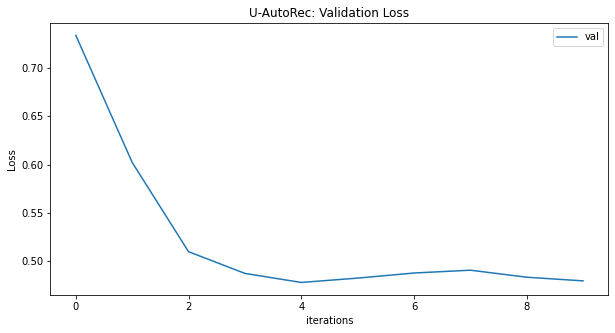

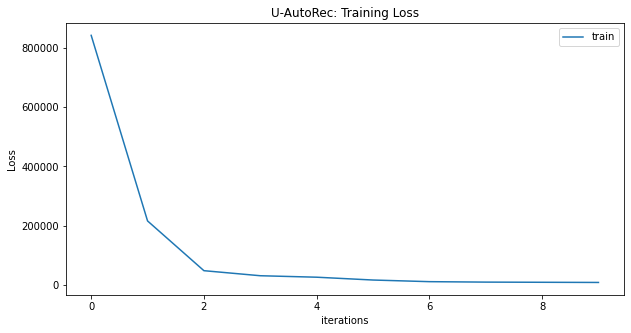

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("U-AutoRec: Validation Loss")
plt.plot(d["User"][1],label="val")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("U-AutoRec: Training Loss")
plt.plot(d["User"][0],label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

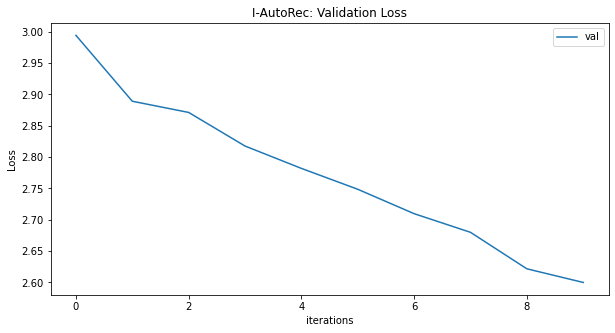

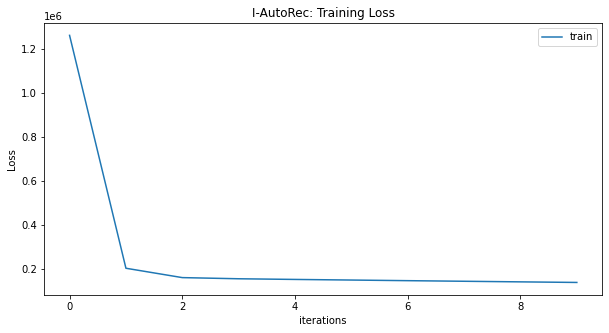

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("I-AutoRec: Validation Loss")
plt.plot(d["Item"][1],label="val")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.title("I-AutoRec: Training Loss")
plt.plot(d["Item"][0],label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


**quantitative results**

In [ ]:
def chunk_to_indx_data(chunks,chunk_id,zero_vector):
  chunk_list = []
  for row_id in range(len(chunks[chunk_id])):
    r_vector = zero_tensor.detach().clone()

    for i in chunks[chunk_id][row_id][1]:
      r_vector[int(i[1])] = i[0]/5
      #r_vector[int(i[1])] = i[0]+1#normalized
      #r_vector[int(i[1])] = i[0]
    chunk_list.append([chunks[chunk_id][row_id][0],r_vector])
  return chunk_list  
def add_zeroes(input, zerovector):
  r_vector = zero_tensor.detach().clone()

  for i in input:
    r_vector[int(i[1])] = i[0]/5

  return r_vector

In [ ]:
net.eval()
count = 0
loss = 0
k=10
top_k_dict = {}
chunks_comb = chunks+chunks_val

zero_tensor = torch.zeros(input_output_size)

top_k_popular = tr_df['i'].value_counts()[:k].index.tolist()


for chunk_id in range(len(chunks)):
   
  print("start chunk:" , chunk_id)
  chunk_list = chunk_to_indx_data(chunks,chunk_id,zero_tensor)

  with torch.no_grad():

    for i,data in chunk_list:

        outputs = net(data.to(device))

        train_loss = loss_function(outputs, data.to(device))
        
        sig_outputs = ~(torch.sign(data).bool()) * outputs.cpu()
  
        top_k_dict[i] = torch.topk(sig_outputs,k)

        count += 1
        loss += train_loss





start chunk: 0
start chunk: 1
start chunk: 2
start chunk: 3
start chunk: 4
start chunk: 5
start chunk: 6
start chunk: 7


In [ ]:

print(top_k_popular)

r_vector_top_k = zero_tensor.detach().clone()
for pop in top_k_popular:
  r_vector_top_k[pop] = 1

print(r_vector_top_k)

[107, 552, 475, 1959, 449, 260, 569, 93, 89, 87]
tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [ ]:
import numpy as np
from sklearn.metrics import ndcg_score

net.eval()

if_c = 0
else_c = 0

hitrate = 0
recall = 0
ndcg = 0

hitrate_pop = 0
recall_pop = 0
ndcg_pop = 0

data_points = 0

loss = 0

recom_example = {
    "user":"",
    "history":[],
    "recomends":[]
}

for chunk_id in range(len(chunks_test)):
  

  chunk_list = chunk_to_indx_data(chunks_test,chunk_id,zero_tensor)
 
  with torch.no_grad():
    
    for i, data in chunk_list:

        if i in top_k_dict.keys():

          

          data_indices = torch.flatten(torch.nonzero(data))
          data_ratings_only = torch.flatten(data[data.nonzero()])
          
          
          
          rec_indices_pop = top_k_popular
          rec_indices = top_k_dict[i].indices.cpu()

          intersect = np.intersect1d(data_indices, rec_indices)
          intersect_pop = np.intersect1d(data_indices, rec_indices_pop)


          hitrate += len(intersect)
          hitrate_pop += len(intersect_pop)

          data_points += len(data_indices)


          inp = add_zeroes(list_dict_train[i],zero_tensor)
          outputs = net(inp.to(device))
          train_loss = loss_function_val(outputs, data.to(device))
          loss += train_loss
          
          if len(intersect) >= 4:
            recom_example['user'] = i
            recom_example['history'] = list_dict_train[i]
            recom_example['recomends'] = intersect


          ndcg += ndcg_score([data.tolist()],[outputs.tolist()],k=k)
          ndcg_pop += ndcg_score([data.tolist()],[r_vector_top_k.tolist()],k=k)

          if_c += 1
          

        else:
          else_c += 1 
          


hitrate_k = hitrate/if_c
recall_k = hitrate/data_points
ndcg_k = ndcg/if_c

hitrate_k_pop = hitrate_pop/if_c
recall_k_pop = hitrate_pop/data_points
ndcg_k_pop = ndcg_pop/if_c

loss = loss/if_c

#print(loss.item())

print("k=",k)
print("AutoRec: hitrate@k = {:.6f}, recall@k = {:.6f}, ndcg@k = {:.6f}".format(hitrate_k,recall_k,ndcg_k))
print("Top k popular: hitrate@k = {:.6f}, recall@k = {:.6f}, ndcg@k = {:.6f}".format(hitrate_k_pop,recall_k_pop,ndcg_k_pop))

k= 10
AutoRec: hitrate@k = 0.315217, recall@k = 0.013128, ndcg@k = 0.022349
Top k popular: hitrate@k = 0.206522, recall@k = 0.008601, ndcg@k = 0.020000


**qualitative results**

In [ ]:
print("example user: ", recom_example['user'])
print("history of user")
recipe_full_information.drop(['u','id'], axis=1, inplace=True)

example user:  322
history of user


In [ ]:
for hist in recom_example["history"]:
  print(recipe_full_information.loc[recipe_full_information['i'] == hist[1]].name)

58548    homemade chicken pot pie
Name: name, dtype: object
105642    fruit salad or dessert
Name: name, dtype: object
30217    cucumber and cream cheese appetizers
Name: name, dtype: object
76119    chinese pot stickers
Name: name, dtype: object
108141    easy crock pot macaroni and cheese
Name: name, dtype: object
26985    old fashioned corn and potato chowder
Name: name, dtype: object
86682    fruit salsa and cinnamon chips
Name: name, dtype: object
194589    easy chicken egg rolls
Name: name, dtype: object
153071    cheesy orzo
Name: name, dtype: object
140670    tandoori chicken burgers with creamy chutney
Name: name, dtype: object
59272    bandito chili dogs
Name: name, dtype: object
200009    low fat carrot cake muffins  that don t taste low fat
Name: name, dtype: object
155923    do at home onion rings
Name: name, dtype: object
46848    spicy onions and bratwurst
Name: name, dtype: object
108740    sticky pork chops
Name: name, dtype: object
180958    chewy popcorn balls
Name: 

In [ ]:
for rec in recom_example["recomends"]:
  print(recipe_full_information.loc[recipe_full_information['i'] == rec].name)

27139    crock pot whole chicken
Name: name, dtype: object
32369    creamy burrito casserole
Name: name, dtype: object
126631    southwestern baked spaghetti
Name: name, dtype: object
143703    awesome slow cooker pot roast
Name: name, dtype: object
